# Develop a DCGAN model for CIFAR-10 small object Photograph Dataset, for implement this model - create a generator and discriminator model and then generate the new set of fake images to ensure the GAN outcome.

In [1]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test shape:\t',xtest.shape,ytest.shape)

Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test shape:	 (10000, 32, 32, 3) (10000, 1)


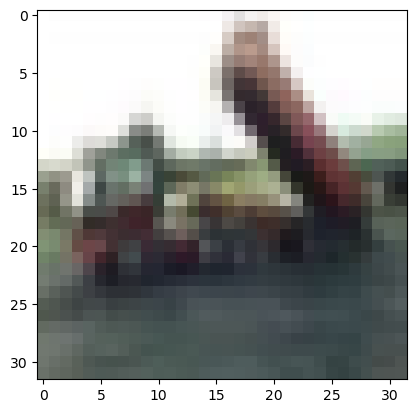

In [3]:
plt.imshow(xtrain[2],cmap='gray')

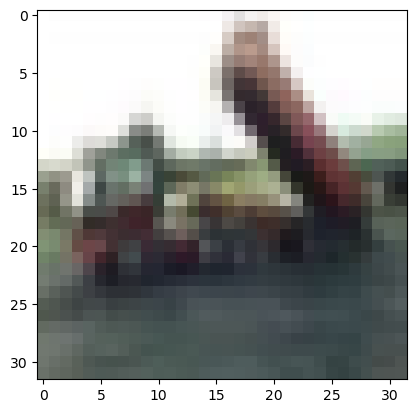

In [4]:
plt.imshow(xtrain[2],cmap='gray_r')

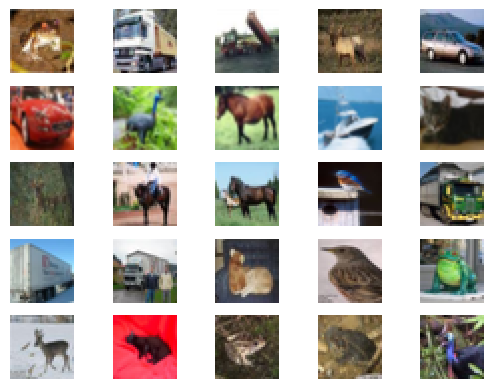

In [5]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
    
plt.show()

In [6]:
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Sequential

In [7]:
def discriminator(in_shape=(32,32,3)):
    model=Sequential()
   
   
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',
                     input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    
    model.add(Flatten())
    
    
    model.add(Dense(1,activation='sigmoid'))
    
    
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    
    model.compile(loss='binary_crossentropy',optimizer=opt,
                  metrics=['accuracy'])
                  
    return model
                  
model=discriminator()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [8]:
from numpy import expand_dims,ones,zeros

def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x

In [9]:
load_real_samples()

array([[[[[0.23137255],
          [0.24313726],
          [0.24705882]],

         [[0.16862746],
          [0.18039216],
          [0.1764706 ]],

         [[0.19607843],
          [0.1882353 ],
          [0.16862746]],

         ...,

         [[0.61960787],
          [0.5176471 ],
          [0.42352942]],

         [[0.59607846],
          [0.49019608],
          [0.4       ]],

         [[0.5803922 ],
          [0.4862745 ],
          [0.40392157]]],


        [[[0.0627451 ],
          [0.07843138],
          [0.07843138]],

         [[0.        ],
          [0.        ],
          [0.        ]],

         [[0.07058824],
          [0.03137255],
          [0.        ]],

         ...,

         [[0.48235294],
          [0.34509805],
          [0.21568628]],

         [[0.46666667],
          [0.3254902 ],
          [0.19607843]],

         [[0.47843137],
          [0.34117648],
          [0.22352941]]],


        [[[0.09803922],
          [0.09411765],
          [0.08235294]],

    

In [10]:
from numpy.random import rand,randint

def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
   
    y=ones((n_samples,1))
    return x,y

In [11]:
generate_real_samples(load_real_samples(),n_samples=10)

(array([[[[[0.64705884],
           [0.6117647 ],
           [0.4117647 ]],
 
          [[0.5803922 ],
           [0.5647059 ],
           [0.36078432]],
 
          [[0.5411765 ],
           [0.5372549 ],
           [0.32941177]],
 
          ...,
 
          [[0.5764706 ],
           [0.5411765 ],
           [0.38431373]],
 
          [[0.5882353 ],
           [0.54901963],
           [0.42745098]],
 
          [[0.5764706 ],
           [0.53333336],
           [0.41960785]]],
 
 
         [[[0.6392157 ],
           [0.60784316],
           [0.41568628]],
 
          [[0.6       ],
           [0.5803922 ],
           [0.3882353 ]],
 
          [[0.54509807],
           [0.53333336],
           [0.3372549 ]],
 
          ...,
 
          [[0.6039216 ],
           [0.5411765 ],
           [0.41568628]],
 
          [[0.5921569 ],
           [0.5294118 ],
           [0.4117647 ]],
 
          [[0.57254905],
           [0.50980395],
           [0.37254903]]],
 
 
         [[[0.5882353 ],

In [12]:
def generate_fake_samples(n_samples):
    x=rand(32*32*3*n_samples)
    
    x=x.reshape(n_samples,32,32,3)
    
    #generate fake class labels
    y=zeros((n_samples,1))
    
    return x,y

In [13]:
generate_fake_samples(10)

(array([[[[4.04313215e-02, 1.68176672e-01, 2.08132242e-01],
          [4.61322870e-01, 9.16933809e-01, 8.15503870e-01],
          [8.96526440e-02, 6.87690363e-01, 9.45318483e-01],
          ...,
          [4.00171017e-01, 3.72543401e-01, 1.61039214e-01],
          [6.98691103e-01, 6.27826168e-01, 6.84837146e-01],
          [2.79528012e-01, 6.52802669e-01, 6.07138932e-01]],
 
         [[8.90120821e-01, 5.24709373e-04, 6.72857366e-01],
          [8.66038260e-01, 8.21322024e-01, 3.04295513e-01],
          [7.06546615e-01, 7.39234834e-01, 9.82076441e-01],
          ...,
          [1.09568290e-02, 4.36855184e-01, 8.19098254e-01],
          [2.13473014e-01, 2.22237403e-01, 5.76842287e-02],
          [4.66353661e-01, 4.44521453e-01, 5.58474122e-01]],
 
         [[4.21648684e-01, 7.73632994e-01, 2.83205523e-01],
          [2.52976979e-01, 6.83302833e-01, 3.18901767e-01],
          [1.91384915e-01, 1.37135069e-03, 3.02778797e-01],
          ...,
          [1.10351280e-02, 3.91651267e-01, 3.8383

In [14]:
def train_discriminative(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//2)
    
    for i in range(n_iter):
        
        xreal,yreal=generate_real_samples(dataset,half_batch)
        
       
        AA,real_acc=model.train_on_batch(xreal,yreal)
        
        
        xfake,yfake=generate_fake_samples(half_batch)
        
        
        BB,fake_acc=model.train_on_batch(xfake,yfake)
        
        
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))

In [15]:
model=discriminator()
dataset=load_real_samples()

In [16]:
train_discriminative(model,dataset)

>1 real=19% fake=58%
>2 real=31% fake=59%
>3 real=32% fake=62%
>4 real=32% fake=62%
>5 real=28% fake=68%
>6 real=29% fake=63%
>7 real=32% fake=69%
>8 real=27% fake=66%
>9 real=34% fake=62%
>10 real=27% fake=68%
>11 real=32% fake=72%
>12 real=30% fake=71%
>13 real=29% fake=70%
>14 real=28% fake=73%
>15 real=30% fake=82%
>16 real=28% fake=73%
>17 real=34% fake=77%
>18 real=27% fake=84%
>19 real=27% fake=86%
>20 real=38% fake=90%
>21 real=31% fake=88%
>22 real=30% fake=86%
>23 real=30% fake=92%
>24 real=29% fake=91%
>25 real=32% fake=90%
>26 real=30% fake=90%
>27 real=33% fake=91%
>28 real=36% fake=95%
>29 real=27% fake=91%
>30 real=37% fake=96%
>31 real=40% fake=95%
>32 real=29% fake=98%
>33 real=37% fake=98%
>34 real=38% fake=98%
>35 real=32% fake=97%
>36 real=37% fake=98%
>37 real=35% fake=100%
>38 real=42% fake=97%
>39 real=38% fake=99%
>40 real=40% fake=98%
>41 real=42% fake=98%
>42 real=42% fake=99%
>43 real=51% fake=98%
>44 real=45% fake=100%
>45 real=50% fake=100%
>46 real=59% fak

In [17]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

def generator(latent_dim):
    model = Sequential()
   
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model

In [18]:
latent_dim = 100
model = generator(latent_dim)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 128)       262272    
 Transpose)                                           

In [19]:
import numpy as np
from numpy.random import randn

def generate_latent_points(latent_dim, n_samples):
   
    x_input = randn(latent_dim * n_samples)
    
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [20]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

1/1 [==============================] - 0s 430ms/step


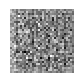

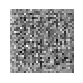

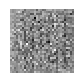

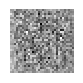

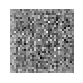

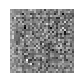

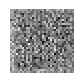

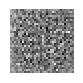

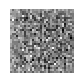

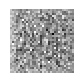

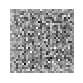

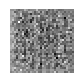

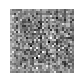

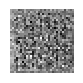

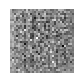

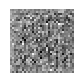

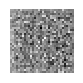

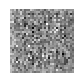

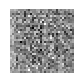

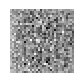

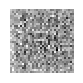

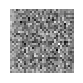

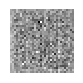

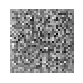

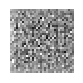

In [21]:
latent_dim = 100
model = generator(latent_dim)
n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)
for i in range(n_samples):
    plt.subplot(5, 5, 1 + i)
    plt.axis('off')
    plt.imshow(x[i, :, :, 0], cmap='gray_r')
    plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load a pre-trained generator model (replace 'your_model_path' with the actual path)
generator = load_model('C:/Users/SIRISHA/ALML')

# Function to generate images from the latent space
def generate_images_from_latent_space(generator, latent_vector):
    generated_images = generator.predict(latent_vector)
    return generated_images

# Function to interpolate between two latent vectors
def interpolate_between_latent_vectors(latent_vector1, latent_vector2, steps=10):
    vectors = []
    for i in range(steps + 1):
        alpha = i / steps
        interpolated_vector = latent_vector1 * (1 - alpha) + latent_vector2 * alpha
        vectors.append(interpolated_vector)
    return np.array(vectors)

# Function to visualize generated images
def plot_generated_images(images, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Generate random latent vectors
latent_vector1 = np.random.normal(size=(1, latent_dim))  # Replace 'latent_dim' with the actual latent space dimension
latent_vector2 = np.random.normal(size=(1, latent_dim))

# Interpolate between the two latent vectors
interpolated_vectors = interpolate_between_latent_vectors(latent_vector1, latent_vector2)

# Generate images from the interpolated latent vectors
generated_images = generate_images_from_latent_space(generator, interpolated_vectors)

# Visualize the generated images
plot_generated_images(generated_images, 1, len(interpolated_vectors))

OSError: SavedModel file does not exist at: C:/Users/SIRISHA/ALML\{saved_model.pbtxt|saved_model.pb}